# Customer viewing behaviour analysis

## Essential Libraries for Data Processing, Analysis, and Visualization

In [1]:
# Import essential libraries for data processing, analysis, and visualization
import pandas as pd  # Data manipulation and DataFrame handling
import numpy as np  # Numerical operations and array handling
import seaborn as sns  # Statistical data visualization (static plots)
import matplotlib.pyplot as plt  # Core Matplotlib library for creating static visualizations
import plotly.express as px  # Simplified interface for creating interactive visualizations
import plotly.graph_objects as go  # Low-level Plotly module for flexible interactive visualization
from plotly.subplots import make_subplots  # For creating complex subplot arrangements in Plotly

# Suppress warning messages for cleaner output
import warnings  # Module to control warning messages
warnings.filterwarnings("ignore")  # Ignore all warnings to keep output uncluttered


# Preliminary Dataset Exploration

In [2]:
# Load dataset
df = pd.read_csv('streaming_viewership_data.csv')

# Check dataset dimensions
print(df.shape)

# Preview the first few rows
df.head()


(6214, 16)


User_ID                            Session_ID  \
0  eb4f9229-74df-45f6-baac-cf19241b8b30  cb2142a7-0750-49ed-b8ac-a975fe1ff69a   
1  661d4b59-4328-410a-901c-1e3b4c40c334  3bc0a662-b353-4015-8b0c-55ceb510d13a   
2  dd3fe9e9-ea82-4891-ab93-8a47c80e3251  bd545b4a-9f54-4e87-b9f8-15ae20b44f22   
3  a1b3365b-1d00-4ddf-bc43-02fc9c10c680  0441086d-c59e-478d-a496-5c5b995ecfdb   
4  338d3f91-5f1c-4590-8803-324901826406  0295f01d-7f15-4799-856c-90c688697ef8   

   Device_ID  Video_ID  Duration_Watched (minutes)        Genre  \
0        232        11                   90.044525       Sci-Fi   
1        549        85                   68.973479       Comedy   
2        844        50                   42.511343       Comedy   
3        201        38                   53.316660  Documentary   
4        700        31                   69.437786       Action   

                            Country  Age  Gender Subscription_Status  Ratings  \
0                             Sudan   56  Female             Premium        3   
1                              Cuba   52    Male             Premium        3   
2                             Japan   14  Female             Premium        3   
3  Lao People's Democratic Republic   36    Male             Premium        2   
4                        Bangladesh   31    Male             Premium        4   

  Languages Device_Type          Location Playback_Quality  Interaction_Events  
0   Spanish  Smartphone         Reedshire               4K                  73  
1   Chinese     Desktop       Stevenhaven               SD                  22  
2   Spanish      Tablet        Vaughntown               HD                  41  
3   Spanish      Laptop  East Raymondbury               SD                  40  
4    German      Laptop    Michaelchester               HD                  41

In [3]:
# Drop irrelevant columns
columns_to_drop = ['User_ID', 'Session_ID', 'Location', 'Languages']

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device_ID                   6214 non-null   int64  
 1   Video_ID                    6214 non-null   int64  
 2   Duration_Watched (minutes)  6214 non-null   float64
 3   Genre                       6214 non-null   object 
 4   Country                     6214 non-null   object 
 5   Age                         6214 non-null   int64  
 6   Gender                      6214 non-null   object 
 7   Subscription_Status         6214 non-null   object 
 8   Ratings                     6214 non-null   int64  
 9   Device_Type                 6214 non-null   object 
 10  Playback_Quality            6214 non-null   object 
 11  Interaction_Events          6214 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 582.7+ KB
None


# Exploratory Data Analysis

## Summary of Dataset Structure

In [4]:
# Display a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device_ID                   6214 non-null   int64  
 1   Video_ID                    6214 non-null   int64  
 2   Duration_Watched (minutes)  6214 non-null   float64
 3   Genre                       6214 non-null   object 
 4   Country                     6214 non-null   object 
 5   Age                         6214 non-null   int64  
 6   Gender                      6214 non-null   object 
 7   Subscription_Status         6214 non-null   object 
 8   Ratings                     6214 non-null   int64  
 9   Device_Type                 6214 non-null   object 
 10  Playback_Quality            6214 non-null   object 
 11  Interaction_Events          6214 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 582.7+ KB


## Descriptive Statistics for Numerical Columns

In [5]:
# Generate summary statistics for numerical columns in the DataFrame
df.describe()


Device_ID     Video_ID  Duration_Watched (minutes)          Age  \
count  6214.000000  6214.000000                 6214.000000  6214.000000   
mean    496.762150    50.323785                   60.378389    39.665594   
std     287.681163    28.671178                   34.597273    17.571317   
min       1.000000     1.000000                    0.055809    10.000000   
25%     248.000000    26.000000                   30.413538    24.000000   
50%     493.500000    50.000000                   60.765637    40.000000   
75%     742.000000    75.000000                   90.874141    55.000000   
max    1000.000000   100.000000                  119.999972    70.000000   

           Ratings  Interaction_Events  
count  6214.000000         6214.000000  
mean      2.987448           50.776794  
std       1.403304           29.009363  
min       1.000000            0.000000  
25%       2.000000           26.000000  
50%       3.000000           51.000000  
75%       4.000000           76.000000  
max       5.000000          100.000000

## Visualizing the Distribution of Viewing Duration

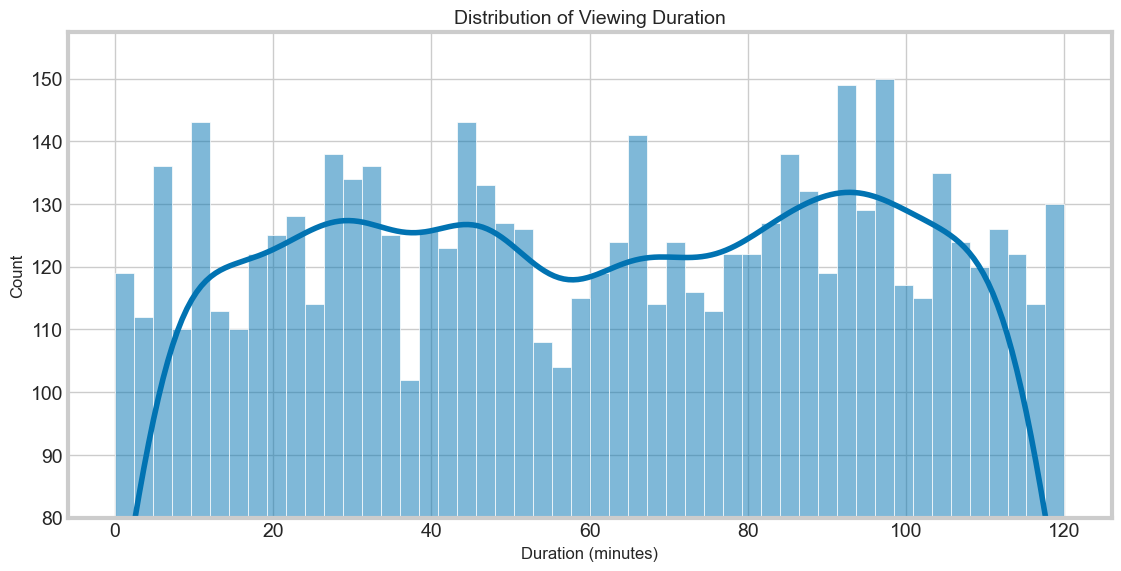

In [6]:
# Set styling for visualization consistency and readability
plt.style.use('fivethirtyeight')  # Apply the fivethirtyeight style for enhanced plot aesthetics
sns.set_style("whitegrid")  # Set white grid background for Seaborn plots
sns.set_palette("colorblind")  # Use colorblind-friendly palette for improved accessibility

# Plotting the distribution of viewing duration
plt.figure(figsize=(12, 6))  # Define figure size for clear visualization
sns.histplot(data=df, x='Duration_Watched (minutes)', bins=50, kde=True)  # Plot histogram with KDE for duration data
plt.title('Distribution of Viewing Duration', fontsize=14)  # Title with appropriate font size
plt.xlabel('Duration (minutes)', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)  # Label for y-axis
plt.ylim(80, None)  # Set y-axis lower limit to 80 for improved focus on distribution
plt.show()  # Display the plot


## Analyzing the Distribution of Content Genres

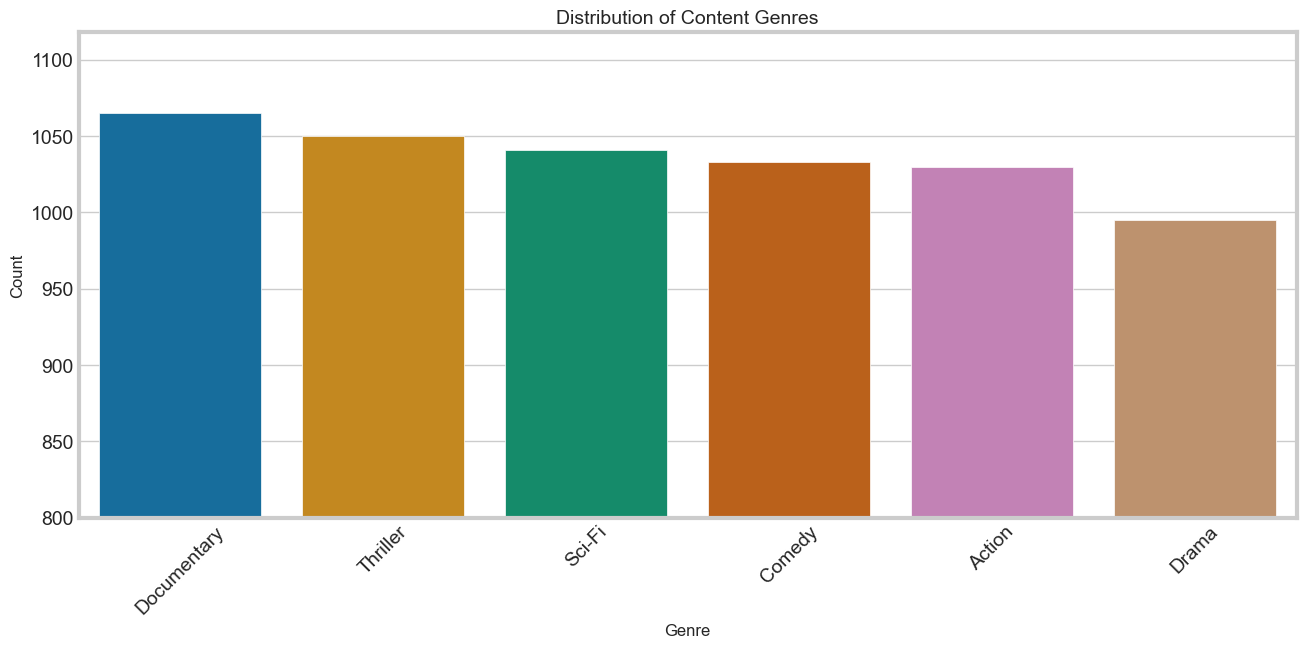

In [7]:
# Genre Analysis: Visualize distribution of content genres
plt.figure(figsize=(14, 6))  # Define figure size for a well-spaced bar plot
genre_counts = df['Genre'].value_counts()  # Count occurrences of each genre

# Create bar plot for genre distribution
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Content Genres', fontsize=14)  # Title for plot clarity
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Genre', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)  # Label for y-axis
plt.ylim(800, None)  # Start y-axis at 800 to highlight variations

plt.show()  # Display the plot

## Relationship between Viewer Age and Viewing Duration

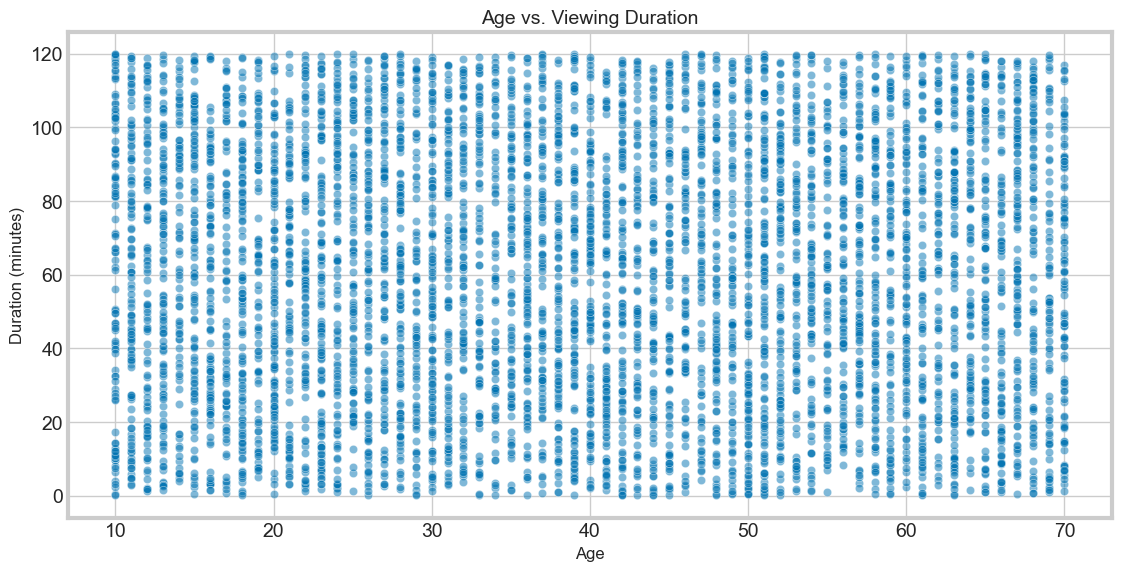

In [8]:
# Age vs. Duration Analysis: Explore relationship between viewer age and viewing duration
plt.figure(figsize=(12, 6))  # Set figure size for balanced layout
sns.scatterplot(data=df, x='Age', y='Duration_Watched (minutes)', alpha=0.5)  # Scatter plot with semi-transparency for overlap handling
plt.title('Age vs. Viewing Duration', fontsize=14)  # Plot title
plt.xlabel('Age', fontsize=12)  # Label for x-axis
plt.ylabel('Duration (minutes)', fontsize=12)  # Label for y-axis

plt.show()  # Display the plot

## Distribution of Subscription Status

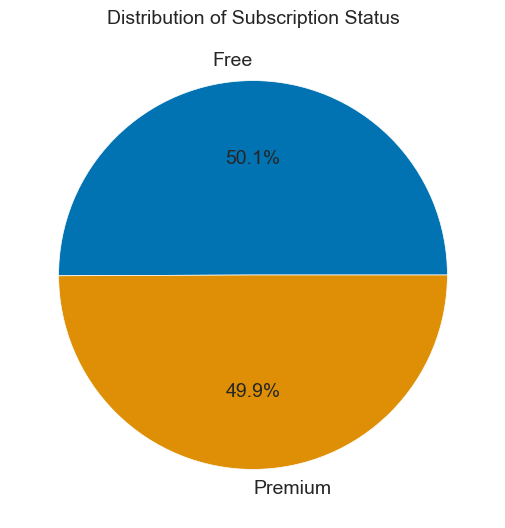

In [9]:
# Subscription Status Analysis: Visualize distribution of subscription statuses
plt.figure(figsize=(10, 6))  # Set figure size for clear pie chart representation
subscription_counts = df['Subscription_Status'].value_counts()  # Count occurrences of each subscription status

# Create pie chart for subscription status distribution
plt.pie(subscription_counts.values, labels=subscription_counts.index, autopct='%1.1f%%')  # Display percentages on the pie chart
plt.title('Distribution of Subscription Status', fontsize=14)  # Title for clarity

plt.show()  # Display the pie chart

## Average Viewing Duration by Device Type

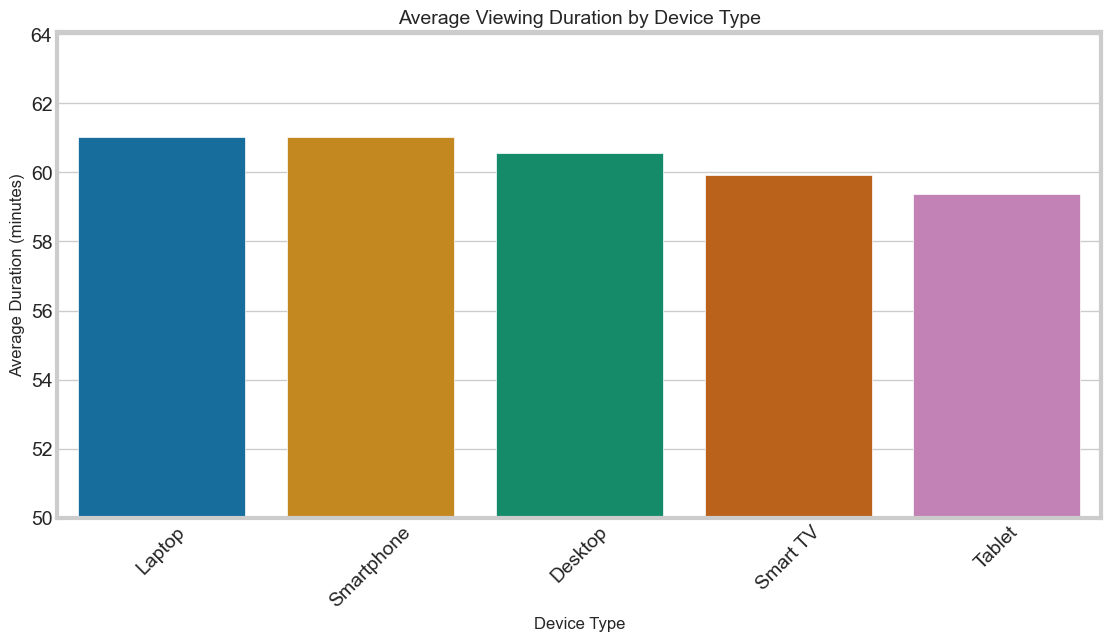

In [10]:
# Device Type Analysis with Average Duration: Analyze viewing duration based on device type
device_duration = df.groupby('Device_Type')['Duration_Watched (minutes)'].mean().sort_values(ascending=False)  # Calculate average duration per device type

plt.figure(figsize=(12, 6))  # Set figure size for clear visualization
sns.barplot(x=device_duration.index, y=device_duration.values)  # Create bar plot for average duration by device type
plt.title('Average Viewing Duration by Device Type', fontsize=14)  # Title for the plot
plt.xlabel('Device Type', fontsize=12)  # Label for x-axis
plt.ylabel('Average Duration (minutes)', fontsize=12)  # Label for y-axis
plt.ylim(50, None)  # Start y-axis at 50 to emphasize variations
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()  # Display the plot

## Ratings Distribution Across Content Genres

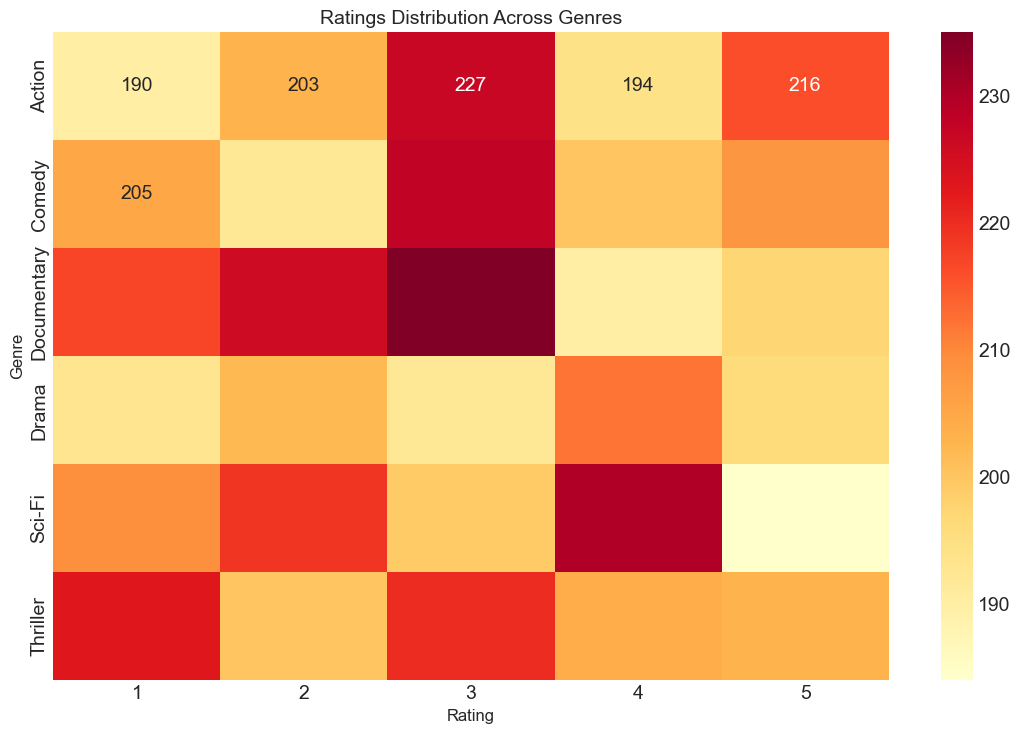

In [11]:
# Heatmap of Ratings vs. Genre: Visualize ratings distribution across different genres
plt.figure(figsize=(12, 8))  # Set figure size for an adequately spaced heatmap
ratings_genre = pd.crosstab(df['Genre'], df['Ratings'])  # Create a cross-tabulation of genres and ratings

# Generate heatmap to visualize the distribution of ratings across genres
sns.heatmap(ratings_genre, annot=True, cmap='YlOrRd', fmt='d')  # Annotate cells with data values; use a yellow-red color map
plt.title('Ratings Distribution Across Genres', fontsize=14)  # Title for the heatmap
plt.xlabel('Rating', fontsize=12)  # Label for x-axis
plt.ylabel('Genre', fontsize=12)  # Label for y-axis

plt.show()  # Display the heatmap

## Interactive Geographical Analysis of Viewing Duration

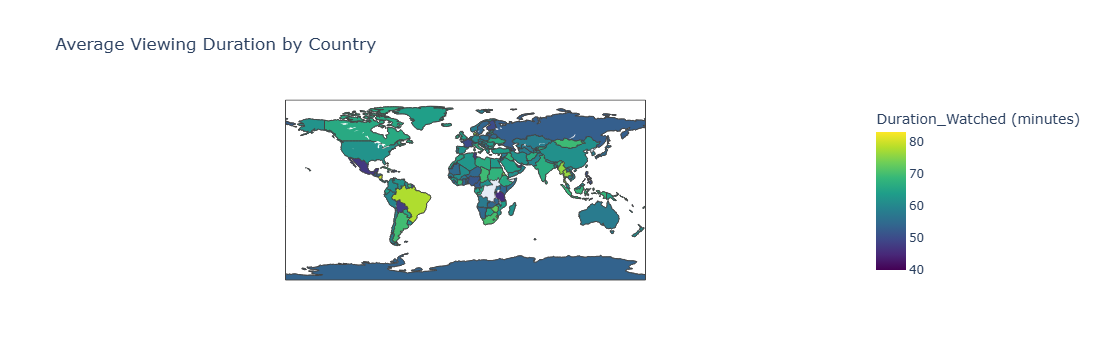

In [12]:
# Interactive Geographical Analysis using Plotly: Visualize average viewing duration by country
fig = px.choropleth(
    df.groupby('Country')['Duration_Watched (minutes)'].mean().reset_index(),  # Group data by country and calculate average duration
    locations='Country',  # Specify the column for geographic locations
    locationmode='country names',  # Use country names for location matching
    color='Duration_Watched (minutes)',  # Set color based on average viewing duration
    title='Average Viewing Duration by Country',  # Title for the choropleth map
    color_continuous_scale='Viridis'  # Use the Viridis color scale for visual appeal
)

fig.show()  # Display the interactive map

## Interaction Events Across Age Groups and Gender

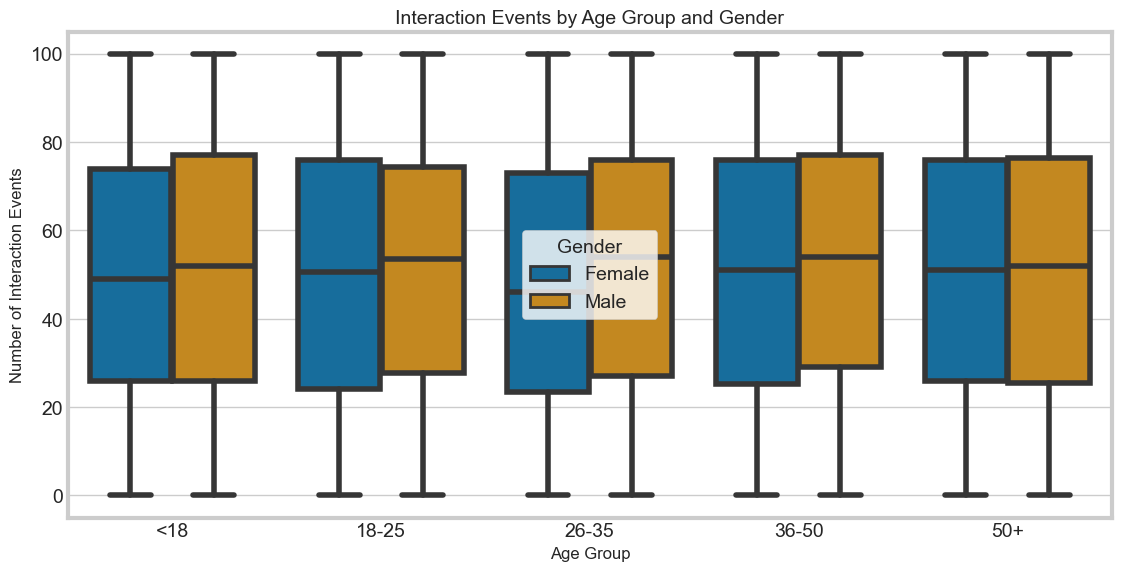

In [13]:
# Gender Distribution by Age Groups with Interaction Events: Analyze interaction events across age groups and gender
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], 
                        labels=['<18', '18-25', '26-35', '36-50', '50+'])  # Categorize ages into defined groups

plt.figure(figsize=(12, 6))  # Set figure size for clear visualization
sns.boxplot(data=df, x='Age_Group', y='Interaction_Events', hue='Gender')  # Create boxplot for interaction events by age group, colored by gender
plt.title('Interaction Events by Age Group and Gender', fontsize=14)  # Title for the plot
plt.xlabel('Age Group', fontsize=12)  # Label for x-axis
plt.ylabel('Number of Interaction Events', fontsize=12)  # Label for y-axis

plt.show()  # Display the plot

## Playback Quality Distribution by Device Type

<Figure size 1200x600 with 0 Axes>

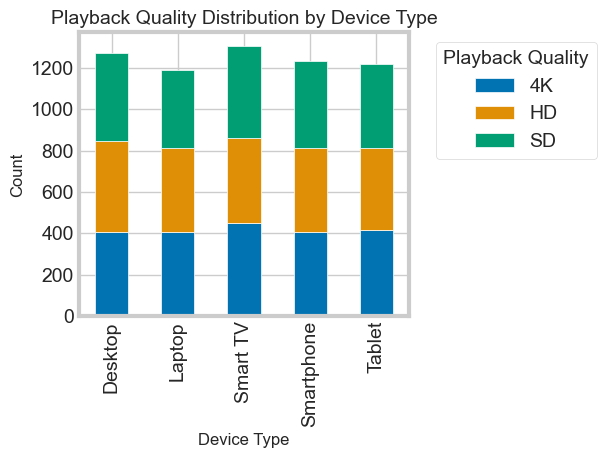

In [14]:
# Playback Quality Distribution by Device Type: Analyze how playback quality varies across different devices
plt.figure(figsize=(12, 6))  # Set figure size for better readability
quality_device = pd.crosstab(df['Device_Type'], df['Playback_Quality'])  # Create a cross-tabulation of device type and playback quality

# Generate a stacked bar plot to visualize playback quality distribution by device type
quality_device.plot(kind='bar', stacked=True)  
plt.title('Playback Quality Distribution by Device Type', fontsize=14)  # Title for the plot
plt.xlabel('Device Type', fontsize=12)  # Label for x-axis
plt.ylabel('Count', fontsize=12)  # Label for y-axis
plt.legend(title='Playback Quality', bbox_to_anchor=(1.05, 1))  # Legend for playback quality

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot


## Viewing Duration Patterns Across Device IDs

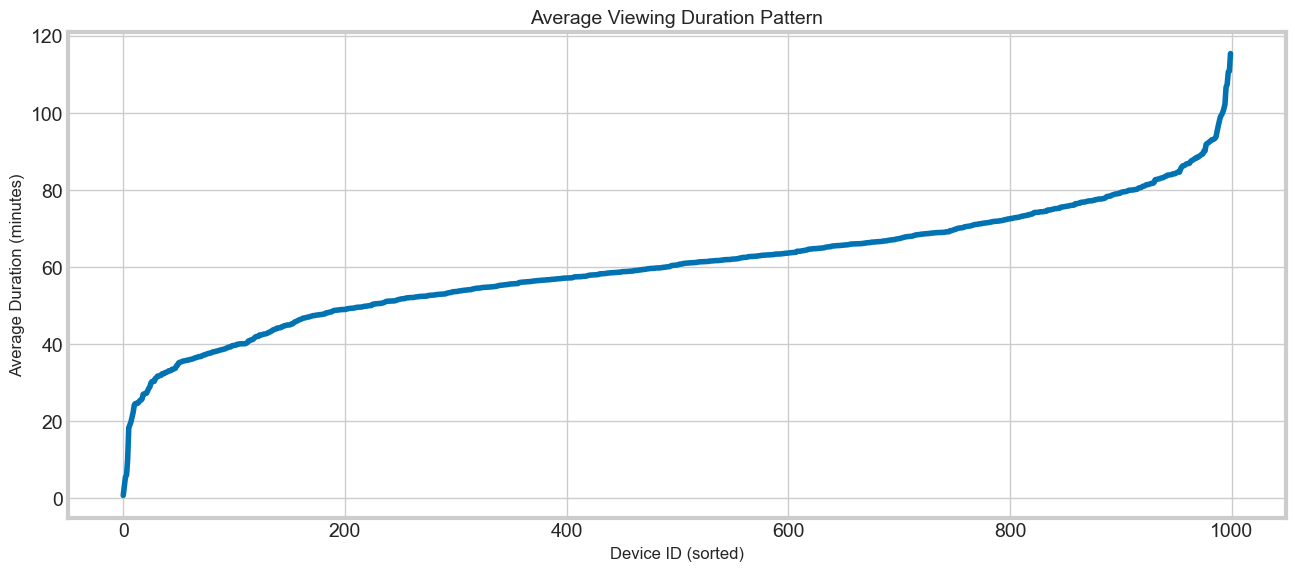

In [15]:
# Time Series Analysis: Visualize average viewing duration patterns across different device IDs
plt.figure(figsize=(14, 6))  # Set figure size for clarity
viewing_patterns = df.groupby('Device_ID')['Duration_Watched (minutes)'].mean().sort_values()  # Group by Device_ID and calculate mean duration

# Plot the average viewing duration pattern for sorted device IDs
plt.plot(viewing_patterns.values)  
plt.title('Average Viewing Duration Pattern', fontsize=14)  # Title for the plot
plt.xlabel('Device ID (sorted)', fontsize=12)  # Label for x-axis
plt.ylabel('Average Duration (minutes)', fontsize=12)  # Label for y-axis

plt.show()  # Display the plot


## Viewing Duration by Age Group and Gender

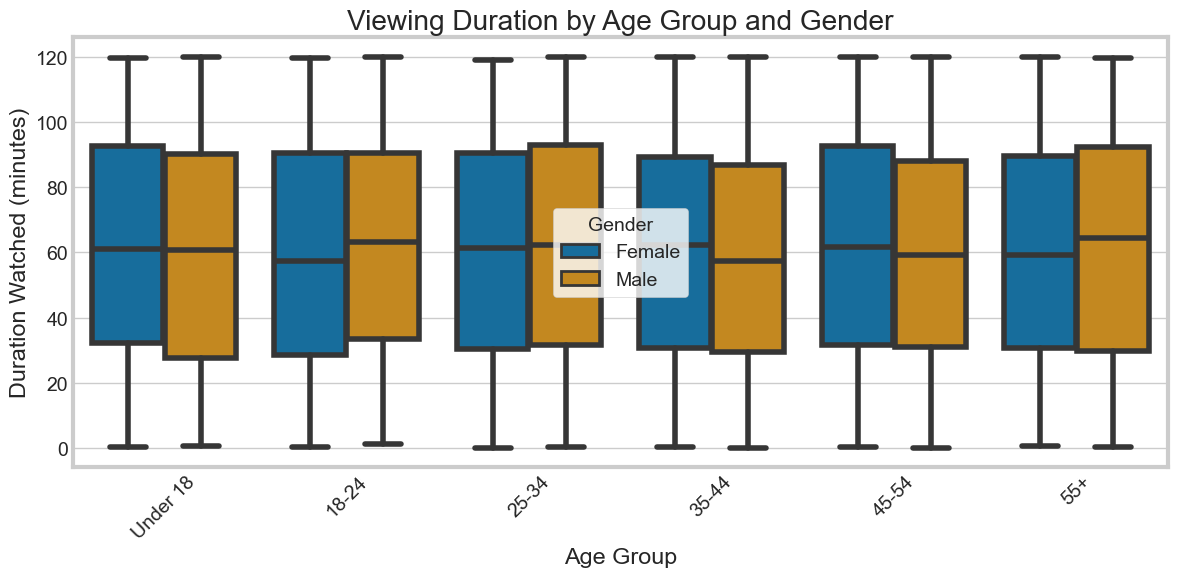

In [16]:
# Demographic Viewing Patterns Analysis

# Create age groups based on age ranges
df['Age_Group'] = pd.cut(df['Age'], 
    bins=[0, 18, 25, 35, 45, 55, 100], 
    labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55+'])

# Plot viewing duration by age group and gender
plt.figure(figsize=(12, 6))  # Set figure size
sns.boxplot(x='Age_Group', y='Duration_Watched (minutes)', hue='Gender', data=df)  # Boxplot for duration by age and gender
plt.title('Viewing Duration by Age Group and Gender')  # Add plot title
plt.xlabel('Age Group')  # Label for x-axis
plt.ylabel('Duration Watched (minutes)')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot


## Average Viewing Duration by Genre and Age Group

<Figure size 1200x800 with 0 Axes>

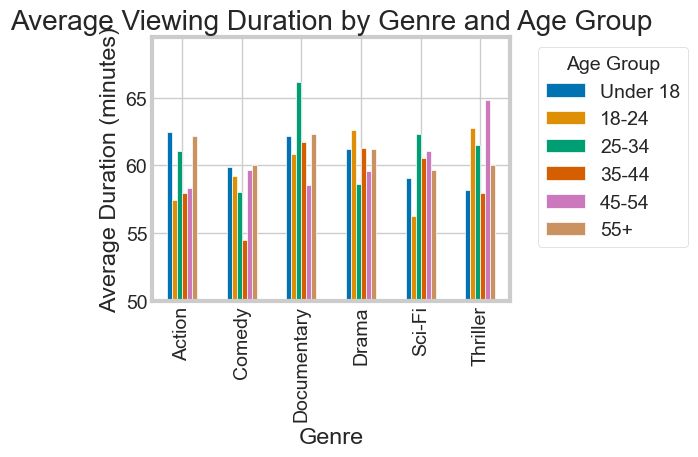

In [17]:
# Calculate the average viewing duration for each combination of Genre and Age Group
# The groupby groups by 'Genre' and 'Age_Group', and mean() calculates the average 'Duration_Watched (minutes)'
genre_age_duration = df.groupby(['Genre', 'Age_Group'])['Duration_Watched (minutes)'].mean().unstack()

# Set up the figure size for better visibility
plt.figure(figsize=(12, 8))

# Create a bar plot for the average viewing duration by genre and age group
# `kind='bar'` makes a bar chart, `stacked=False` keeps bars for each age group separate
genre_age_duration.plot(kind='bar', stacked=False)

# Add a title and labels for the x and y axes
plt.title('Average Viewing Duration by Genre and Age Group')  # Title of the plot
plt.xlabel('Genre')  # Label for the x-axis, representing different genres
plt.ylabel('Average Duration (minutes)')  # Label for the y-axis, showing average duration in minutes

# Place the legend outside the plot on the upper left for clarity
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit all elements neatly and prevent overlap
plt.tight_layout()

# Set the minimum y-axis limit to 50 to focus on significant values (optional)
plt.ylim(50, None)

# Display the plot
plt.show()


## Correlation Between Technical Factors and Interaction Events

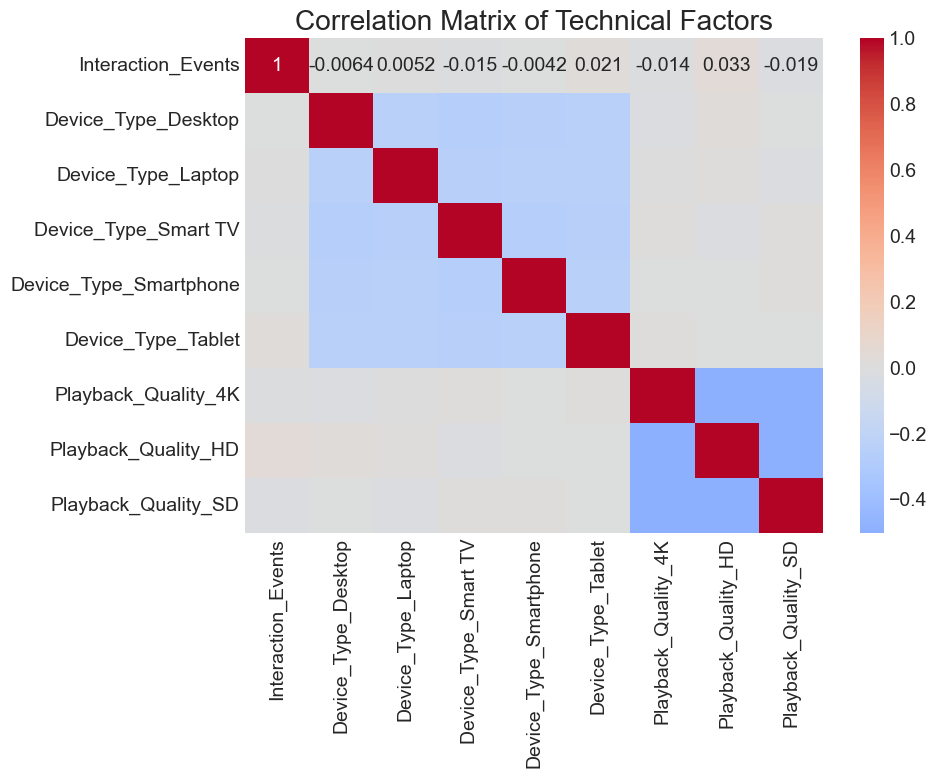

In [18]:
# Technical Engagement Relationship

# Correlation between Interaction Events and Technical Factors
technical_factors = ['Device_Type', 'Playback_Quality', 'Interaction_Events']  # Select technical factors
technical_encoded = pd.get_dummies(df[technical_factors])  # Convert categorical variables to dummy/indicator variables
correlation_matrix = technical_encoded.corr()  # Calculate the correlation matrix

plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)  # Create heatmap for the correlation matrix
plt.title('Correlation Matrix of Technical Factors')  # Add plot title
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot


## Rating Distribution by Content Genre

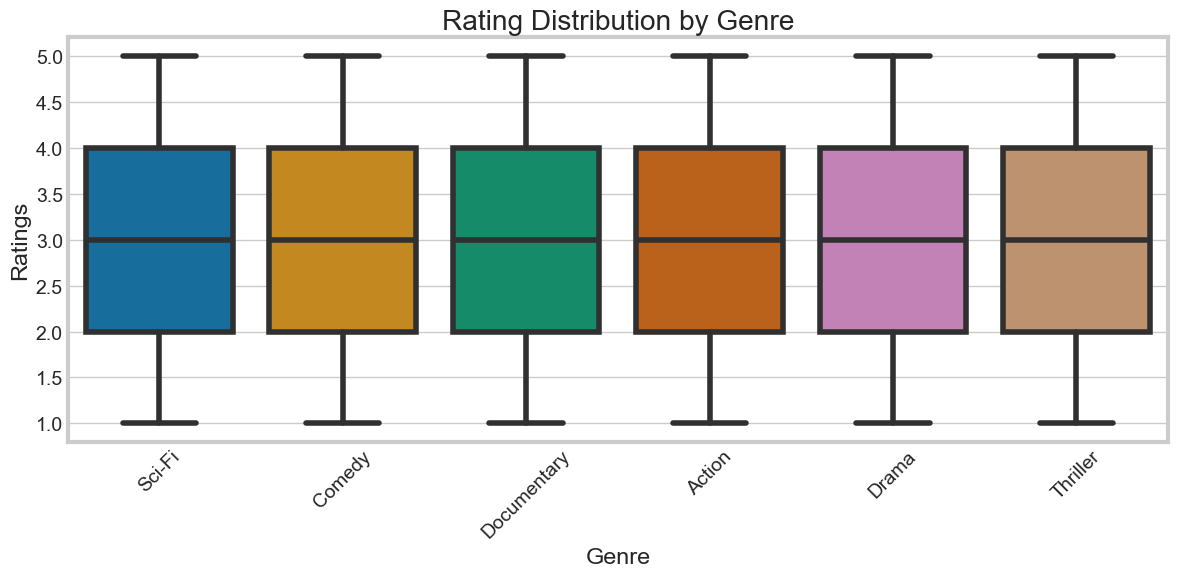

In [19]:
# Genre-wise Rating Distribution

plt.figure(figsize=(12, 6))  # Set figure size
sns.boxplot(x='Genre', y='Ratings', data=df)  # Create boxplot for ratings by genre
plt.title('Rating Distribution by Genre')  # Add plot title
plt.xlabel('Genre')  # Label for x-axis
plt.ylabel('Ratings')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot


## Viewing Duration by Subscription Status and Genre

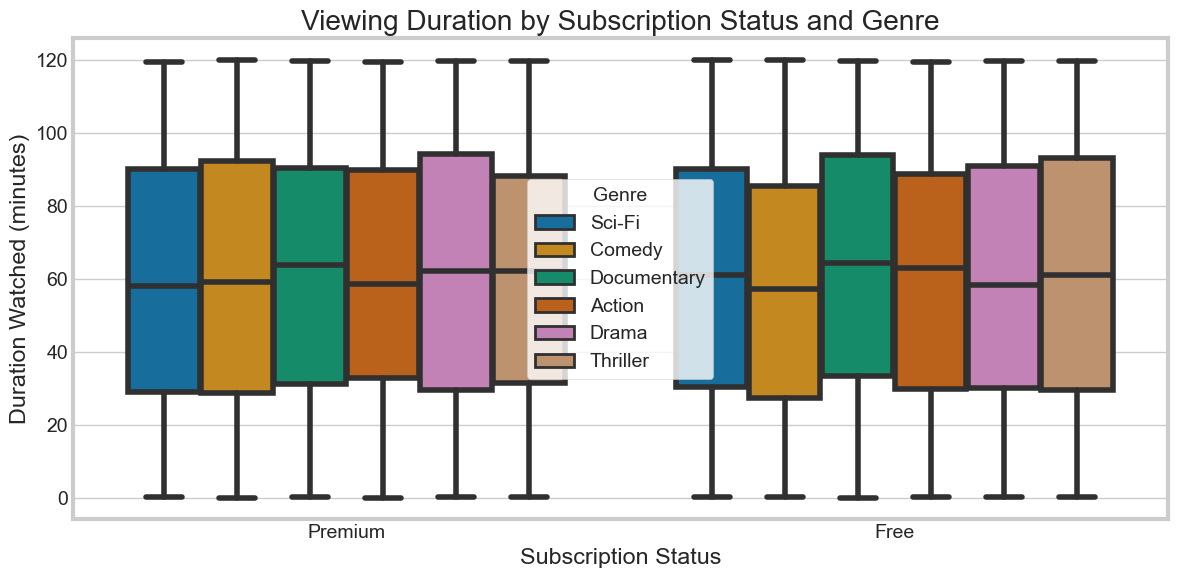

In [20]:
# Subscription Status and Viewing Behavior

plt.figure(figsize=(12, 6))  # Set figure size
sns.boxplot(x='Subscription_Status', y='Duration_Watched (minutes)', hue='Genre', data=df)  # Create boxplot for duration by subscription status and genre
plt.title('Viewing Duration by Subscription Status and Genre')  # Add plot title
plt.xlabel('Subscription Status')  # Label for x-axis
plt.ylabel('Duration Watched (minutes)')  # Label for y-axis
plt.tight_layout()  # Adjust layout
#plt.ylim(20, None)  # Optional: Set y-axis limit
plt.show()  # Display plot


## Interaction Events by Subscription Status

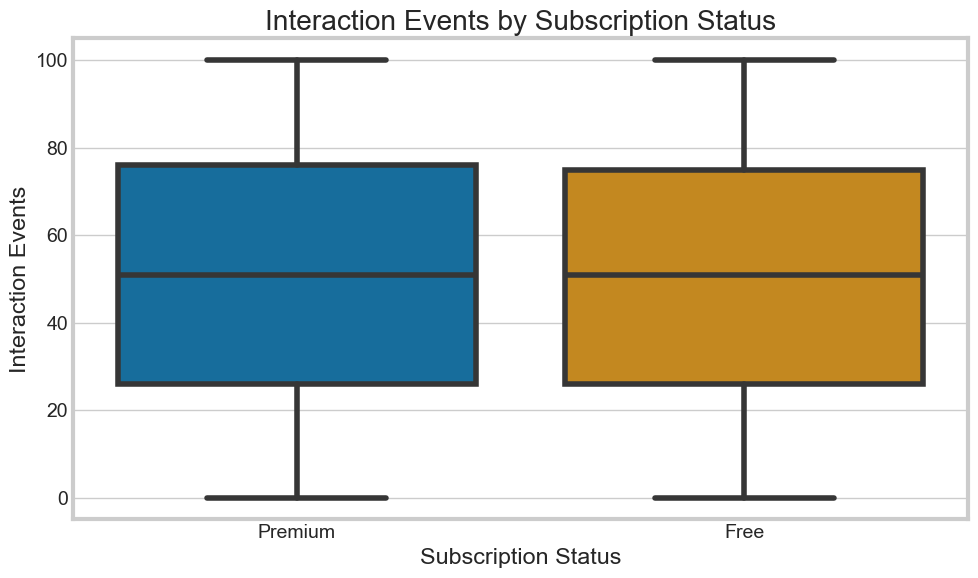

In [21]:
# Interaction Events Distribution by Subscription Status

plt.figure(figsize=(10, 6))  # Set figure size
sns.boxplot(x='Subscription_Status', y='Interaction_Events', data=df)  # Create boxplot for interaction events by subscription status
plt.title('Interaction Events by Subscription Status')  # Add plot title
plt.xlabel('Subscription Status')  # Label for x-axis
plt.ylabel('Interaction Events')  # Label for y-axis
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot


# Data Cleaning

In [22]:
# Define numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Check for duplicates
num_duplicates = df.duplicated().sum()
if num_duplicates > 0:
    print(f"Number of duplicate rows: {num_duplicates}")
    # Remove duplicate rows
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicate rows found.")

# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("Missing values detected:\n", missing_values)
    
    # Fill missing numerical values with median
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

    # Fill missing categorical values with mode
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

    print("Missing values handled.")
else:
    print("No missing values detected.")

# Remove outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print("Outliers removed.")


No duplicate rows found.
No missing values detected.
Outliers removed.


# Data Preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Automatically select numerical columns based on their data type
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Standardize numerical attributes
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Encode subscription status as binary
df['Subscription_Status'] = df['Subscription_Status'].map({'Premium': 1, 'Free': 0}).astype(int)

# One-hot encoding for categorical columns
encoded_columns = pd.get_dummies(df[['Device_Type', 'Playback_Quality', 'Gender']], drop_first=True, dtype=int)
df = pd.concat([df, encoded_columns], axis=1)
df = df.drop(columns=['Device_Type', 'Playback_Quality', 'Gender'])

# Calculate interaction rate: interactions per minute
df['Interaction_Rate'] = df['Interaction_Events'] / df['Duration_Watched (minutes)']

# Check the updated DataFrame structure
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Device_ID                   6214 non-null   float64 
 1   Video_ID                    6214 non-null   float64 
 2   Duration_Watched (minutes)  6214 non-null   float64 
 3   Genre                       6214 non-null   object  
 4   Country                     6214 non-null   object  
 5   Age                         6214 non-null   float64 
 6   Subscription_Status         6214 non-null   int32   
 7   Ratings                     6214 non-null   float64 
 8   Interaction_Events          6214 non-null   float64 
 9   Age_Group                   6214 non-null   category
 10  Device_Type_Laptop          6214 non-null   int32   
 11  Device_Type_Smart TV        6214 non-null   int32   
 12  Device_Type_Smartphone      6214 non-null   int32   
 13  Device_Type_Tablet

# Feature Engineering

In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# One-hot encode 'Genre' and 'Country' with integer values (0 and 1)
encoded_categorical = pd.get_dummies(df[['Genre', 'Country']], drop_first=True, dtype=int)

# Concatenate the encoded columns back to the original DataFrame
df = pd.concat([df, encoded_categorical], axis=1)

# Drop the original 'Genre' and 'Country' columns
df = df.drop(['Genre', 'Country'], axis=1)

# Encode 'Age_Group' using LabelEncoder
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])

# Check the updated DataFrame structure
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Columns: 263 entries, Device_ID to Country_Zimbabwe
dtypes: float64(7), int32(256)
memory usage: 6.4 MB
None


In [25]:
df.head()

Device_ID  Video_ID  Duration_Watched (minutes)       Age  \
0  -0.920406 -1.371654                    0.857539  0.929681   
1   0.181597  1.209542                    0.248453  0.702019   
2   1.207120 -0.011294                   -0.516471 -1.460770   
3  -1.028173 -0.429866                   -0.204129 -0.208629   
4   0.706526 -0.674034                    0.261874 -0.493207   

   Subscription_Status   Ratings  Interaction_Events  Age_Group  \
0                    1  0.008946            0.766132          4   
1                    1  0.008946           -0.992063          3   
2                    1  0.008946           -0.337049          5   
3                    1 -0.703716           -0.371524          2   
4                    1  0.721607           -0.337049          1   

   Device_Type_Laptop  Device_Type_Smart TV  ...  Country_Uruguay  \
0                   0                     0  ...                0   
1                   0                     0  ...                0   
2                   0                     0  ...                0   
3                   1                     0  ...                0   
4                   1                     0  ...                0   

   Country_Uzbekistan  Country_Vanuatu  Country_Venezuela  Country_Vietnam  \
0                   0                0                  0                0   
1                   0                0                  0                0   
2                   0                0                  0                0   
3                   0                0                  0                0   
4                   0                0                  0                0   

   Country_Wallis and Futuna  Country_Western Sahara  Country_Yemen  \
0                          0                       0              0   
1                          0                       0              0   
2                          0                       0              0   
3                          0                       0              0   
4                          0                       0              0   

   Country_Zambia  Country_Zimbabwe  
0               0                 0  
1               0                 0  
2               0                 0  
3               0                 0  
4               0                 0  

[5 rows x 263 columns]

## Data Splitting

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define target variable and features
X = df.drop(columns=['Subscription_Status'])
y = df['Subscription_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Feature Importance using Principal Component Analysis (PCA) 

In [27]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

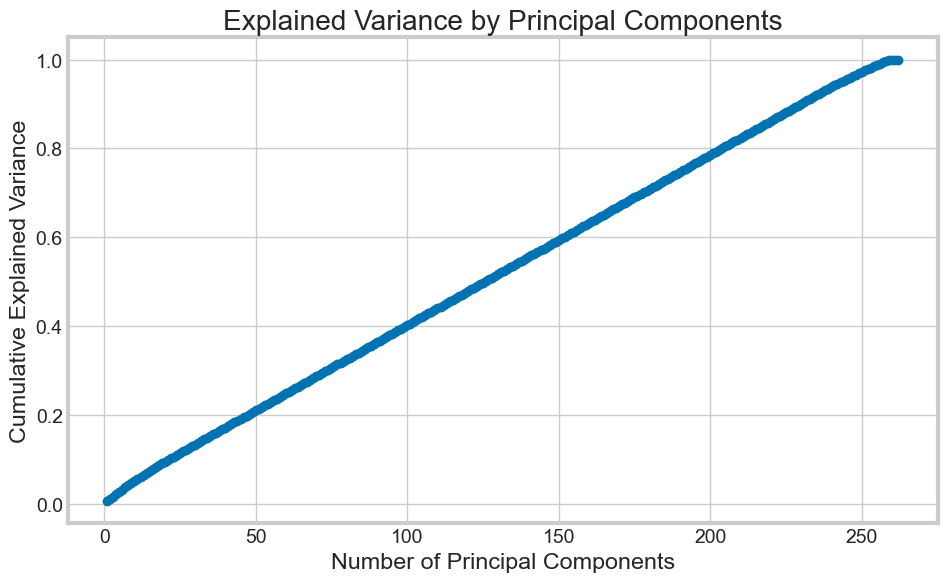

Optimal number of components to retain 95% variance: 244
Shape of original data: (6214, 262)
Shape of reduced data: (6214, 244)


In [28]:
# Step 1: Separate features and target variable
X = df.drop(columns=['Subscription_Status'])  # Drop target variable
y = df['Subscription_Status']

# Step 2: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=None)  # Start with all components
X_pca = pca.fit_transform(X_scaled)

# Step 4: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance to find optimal components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# Step 5: Select optimal number of components (95% variance)
cumulative_variance = explained_variance_ratio.cumsum()
optimal_components = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1
print(f'Optimal number of components to retain 95% variance: {optimal_components}')

# Step 6: Reduce data to optimal components
pca = PCA(n_components=optimal_components)
X_reduced = pca.fit_transform(X_scaled)

# Optional: View reduced data shape
print(f"Shape of original data: {X.shape}")
print(f"Shape of reduced data: {X_reduced.shape}")


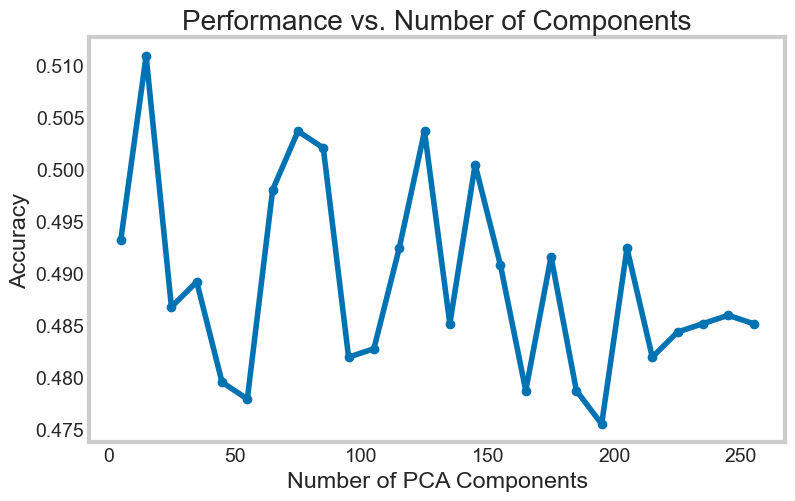

In [29]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize variables
components_range = range(5, X_train.shape[1], 10)  # Start small and incrementally increase
performance = []

# Loop over different numbers of components
for n in components_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    
    # Train a model (e.g., Random Forest)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    # Measure accuracy
    acc = accuracy_score(y_test, y_pred)
    performance.append(acc)

# Plot Performance vs. Number of Components
plt.figure(figsize=(8, 5))
plt.plot(components_range, performance, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Performance vs. Number of Components')
plt.grid()
plt.show()


# Modelling

In [30]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import AgglomerativeClustering
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Logistic Regression model                                                                                                                                      

Logistic Regression Accuracy: 0.48431214802896216

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.52      0.50       619
           1       0.49      0.45      0.47       624

    accuracy                           0.48      1243
   macro avg       0.48      0.48      0.48      1243
weighted avg       0.48      0.48      0.48      1243


Confusion Matrix:
 [[319 300]
 [341 283]]


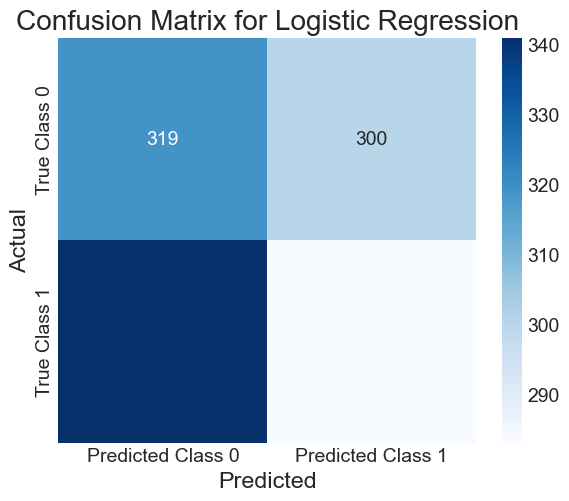

In [31]:
pca = PCA(n_components=90)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['True Class 0', 'True Class 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Hyperparameter Logistic Regression Model

In [32]:
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Initialize Logistic Regression with regularization and class weights
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_std, y_train)

# Best parameters and model
best_log_reg = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Evaluate the model
y_pred = best_log_reg.predict(X_test_std)
accuracy = best_log_reg.score(X_test_std, y_test)
print("Logistic Regression Accuracy:", accuracy)


Best parameters: {'C': 0.1, 'penalty': 'l1'}
Logistic Regression Accuracy: 0.49396621078037006


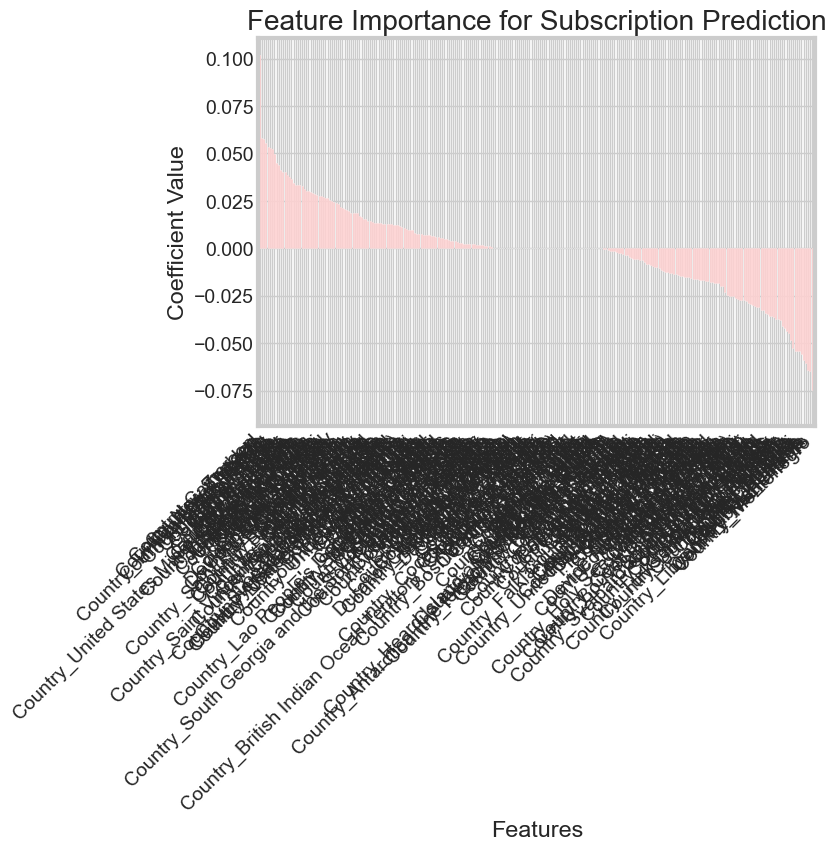

In [33]:
# Feature Importance Visualization
feature_importance = pd.Series(best_log_reg.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Feature Importance for Subscription Prediction')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')

# Rotate feature names by 45 degrees
plt.xticks(rotation=45, ha='right')  # ha='right' ensures alignment to the right
plt.tight_layout()  # Ensures everything fits within the figure
plt.show()


In [34]:
# Extract feature names
feature_names = X.columns

# Print the first 10 feature names
print("First 10 Feature Names:")
print(feature_names[:10])


First 10 Feature Names:
Index(['Device_ID', 'Video_ID', 'Duration_Watched (minutes)', 'Age', 'Ratings',
       'Interaction_Events', 'Age_Group', 'Device_Type_Laptop',
       'Device_Type_Smart TV', 'Device_Type_Smartphone'],
      dtype='object')


In [35]:
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_std = scaler.transform(X_test)        # Transform test data using the same scaler

# Initialize Logistic Regression with regularization and class weights
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_std, y_train)

# Best parameters and model
best_log_reg = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Use the trained model to predict subscription status on the test set
subscription_predictions = best_log_reg.predict(X_test_std)

# Print the predictions
print("Predicted Subscription Status (Premium/Free):")
print(subscription_predictions)

# Display comparison of actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': subscription_predictions
})
print("\nPrediction Results:")
print(results_df.head(10))  # Display first 10 rows


Best parameters: {'C': 0.1, 'penalty': 'l1'}
Predicted Subscription Status (Premium/Free):
[0 1 1 ... 1 0 0]

Prediction Results:
      Actual  Predicted
4445       1          0
2273       1          1
5351       1          1
5877       1          1
167        1          0
4056       0          1
4900       1          0
3996       1          1
3771       0          0
3910       1          0


## XGBoost Model

In [37]:
# Assign target variable: Duration_Watched (minutes)
target = 'Duration_Watched (minutes)'  # Explicitly set the target column
y = df[target]               # Extract target column
X = df.drop(columns=[target])  # Drop target column from features

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA on the features (after split)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)  # Apply PCA on training data
X_test_pca = pca.transform(X_test)        # Transform test data

# Initialize and train the XGBoost model
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the model
xgb_regressor.fit(X_train_pca, y_train)

# Predict on test data
y_pred = xgb_regressor.predict(X_test_pca)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("XGBoost Regressor Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


XGBoost Regressor Performance:
Mean Absolute Error (MAE): 0.33625795454474644
Mean Squared Error (MSE): 0.24732010166926013
R-squared (R2): 0.7467926203284276


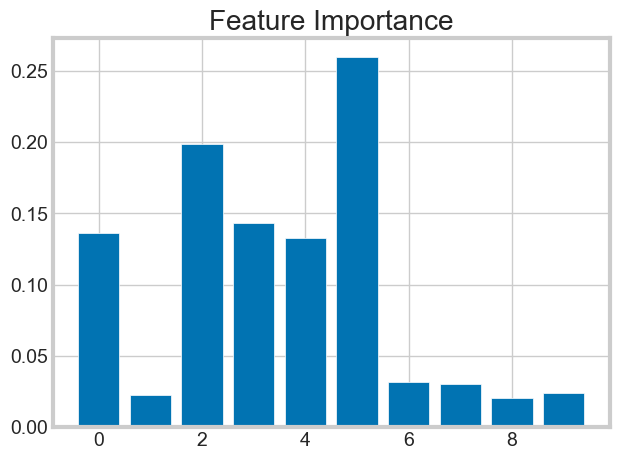

In [38]:
import matplotlib.pyplot as plt
importance = xgb_regressor.feature_importances_
plt.bar(range(len(importance)), importance)
plt.title('Feature Importance')
plt.show()


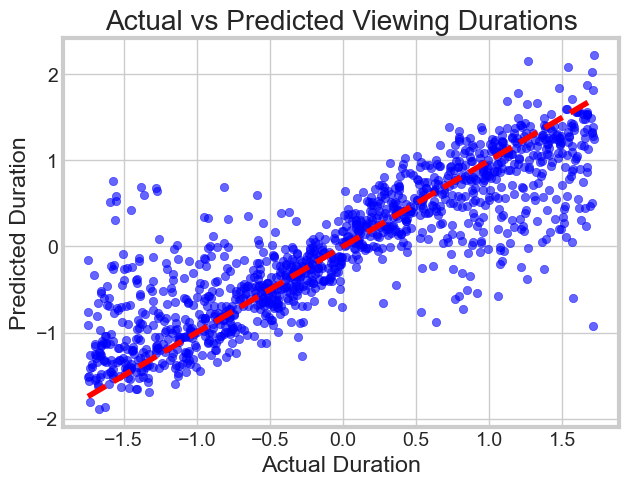

In [39]:
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Viewing Durations')
plt.show()


In [48]:
# Display the first 10 actual vs predicted values
comparison_df = pd.DataFrame({'Actual Duration': y_test, 'Predicted Duration': y_pred})

# Print out the first 10 rows of comparison
print("Comparison of Actual vs Predicted Viewing Durations:")
print(comparison_df.head(10))


Comparison of Actual vs Predicted Viewing Durations:
      Actual Duration  Predicted Duration
4445        -0.533791           -0.582280
2273         0.323249            0.971111
5351         1.158458            1.256574
5877         0.835979            0.587189
167          1.614899            0.449236
4056        -0.998820           -0.989294
4900         1.702241            0.501240
3996        -0.191987           -0.480179
3771         0.824040            0.785747
3910         1.474271            1.220454


## Agglomerative Clustering

In [40]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(X_train_std)

# Print the first 10 cluster labels
print("Agglomerative Cluster Labels:", agg_clusters[:10])

unique, counts = np.unique(agg_clusters, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster Sizes:", cluster_sizes)


Agglomerative Cluster Labels: [2 2 2 1 1 1 1 1 0 2]
Cluster Sizes: {0: 1478, 1: 1238, 2: 2255}


In [41]:
# Combine X_train_std with cluster labels
cluster_df = pd.DataFrame(X_train_std, columns=[f'Feature_{i}' for i in range(X_train_std.shape[1])])
cluster_df['Cluster'] = agg_clusters

# Calculate cluster-wise feature means
cluster_summary = cluster_df.groupby('Cluster').mean()
cluster_summary


Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
Cluster                                                                     
0         0.046084   0.032280  -0.033853   0.018359   0.023111  -0.062662   
1        -0.058888  -0.052664  -0.062670   0.004147   0.111433  -0.060602   
2         0.002125   0.007755   0.056594  -0.014310  -0.076325   0.074341   

         Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_252  \
Cluster                                              ...                
0        -0.004224   0.034679   0.024394  -0.058429  ...    -0.060284   
1         0.000040  -0.078325  -0.080725   0.045338  ...    -0.060284   
2         0.002747   0.020271   0.028329   0.013405  ...     0.072608   

         Feature_253  Feature_254  Feature_255  Feature_256  Feature_257  \
Cluster                                                                    
0           0.157571    -0.058580    -0.056825    -0.061942    -0.079217   
1          -0.066673    -0.058580     0.171347    -0.061942    -0.079217   
2          -0.066673     0.070555    -0.056825     0.074605     0.095411   

         Feature_258  Feature_259  Feature_260  Feature_261  
Cluster                                                      
0          -0.072511    -0.072511    -0.066673    -0.056825  
1           0.218646    -0.072511     0.201043    -0.056825  
2          -0.072511     0.087335    -0.066673     0.068442  

[3 rows x 262 columns]

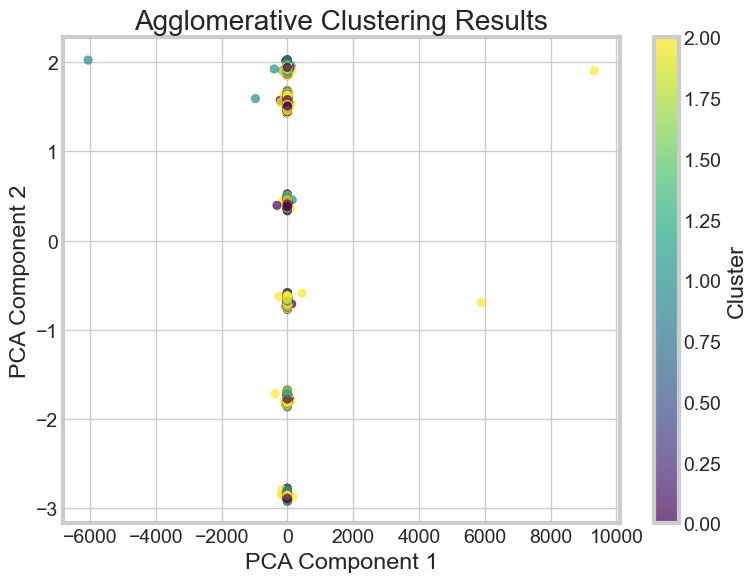

In [42]:
# Scatter plot of PCA-transformed data with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=agg_clusters, cmap='viridis', alpha=0.7)
plt.title('Agglomerative Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [43]:
# Combine PCA-transformed data and cluster labels into a DataFrame
pca_results_df = pd.DataFrame({
    'PCA_Component_1': X_train_pca[:, 0],
    'PCA_Component_2': X_train_pca[:, 1],
    'Cluster_Label': agg_clusters
})

# Display first 10 rows of the results
print("Numerical Results for PCA Components and Cluster Labels:")
print(pca_results_df.head(10))

Numerical Results for PCA Components and Cluster Labels:
   PCA_Component_1  PCA_Component_2  Cluster_Label
0        -2.299740         0.420669              2
1        29.608829         0.406932              2
2        -0.645948        -2.790570              2
3         0.301693        -0.700055              1
4        -2.650786         1.943395              1
5        -0.818331         1.546439              1
6        -5.573150        -1.837385              1
7        -3.821873         0.402541              1
8         1.626279        -2.811932              0
9        -1.562950        -1.732037              2
